In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from synthetic_dataset.csv
df = pd.read_csv('/content/drive/MyDrive/ML/synthetic_dataset.csv')

In [ ]:
X = df[['x1', 'x2']]
y = df['y']

In [ ]:
# Set labels to -1 and 1
y[y == 0] = -1

<ipython-input-61-3577e36c5310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 0] = -1


In [ ]:
# Add a bias term (x0) to the features
X = np.c_[np.ones((X.shape[0], 1)), X]

In [ ]:
#PLA
def PLA(X, y, maxIteration=1000):
    # Initialize weights to zeros
    w = np.zeros(X.shape[1])
    misClassified = True
    iterationCount = 0

    while misClassified and iterationCount < maxIteration:
        misClassified = False

        for i in range(X.shape[0]):
            if np.dot(X[i], w) * y[i] <= 0:
                w += y[i] * X[i]
                misClassified = True

        # Check if all points are correctly classified
        allCorrect = True
        for i in range(X.shape[0]):
            if np.dot(X[i], w) * y[i] <= 0:
                allCorrect = False
                break

        if allCorrect:
            break

        iterationCount += 1

    return w

In [ ]:
# Pocket Algorithm
def pockectAlgo(X, y, maxIteration=1000):
    # Initialize weights to zeros
    wPocket = np.zeros(X.shape[1])
    bestW = np.zeros(X.shape[1])
    bestError = float('inf')

    for _ in range(maxIteration):
        countMisclassified = 0

        for i in range(X.shape[0]):
            if np.dot(X[i], wPocket) * y[i] <= 0:
                countMisclassified += 1

        if countMisclassified < bestError:
            bestW = np.copy(wPocket)
            bestError = countMisclassified

        if countMisclassified == 0:
            break

        # Update weights using a randomly chosen misClassified point
        ranIndex = np.random.choice(np.where(np.dot(X, wPocket) * y <= 0)[0])
        print("Random index Pocket:", ranIndex)
        wPocket += y[ranIndex] * X[ranIndex]

    return bestW


In [ ]:
# Execute the algorithms
wPLA = PLA(X, y)
wPocket = pockectAlgo(X, y)

Random index Pocket: 48
Random index Pocket: 41
Random index Pocket: 46
Random index Pocket: 9
Random index Pocket: 33
Random index Pocket: 21
Random index Pocket: 21
Random index Pocket: 47
Random index Pocket: 27
Random index Pocket: 41
Random index Pocket: 33
Random index Pocket: 21
Random index Pocket: 9
Random index Pocket: 41
Random index Pocket: 12
Random index Pocket: 33
Random index Pocket: 6
Random index Pocket: 0
Random index Pocket: 9
Random index Pocket: 47
Random index Pocket: 33
Random index Pocket: 41
Random index Pocket: 9
Random index Pocket: 33
Random index Pocket: 38
Random index Pocket: 41
Random index Pocket: 33
Random index Pocket: 41
Random index Pocket: 18
Random index Pocket: 9
Random index Pocket: 33
Random index Pocket: 0
Random index Pocket: 9
Random index Pocket: 47
Random index Pocket: 9
Random index Pocket: 27
Random index Pocket: 0


In [ ]:
# Print the final weights for PLA and Pocket Algorithm
print("Final weights for PLA:", wPLA)

Final weights for PLA: [27.         21.49134593 20.55368609]


In [ ]:
# Print the final weights for Pocket Algorithm
print("Final weights for Pocket Algorithm:", wPocket)

Final weights for Pocket Algorithm: [23.         17.42087569 18.53518854]


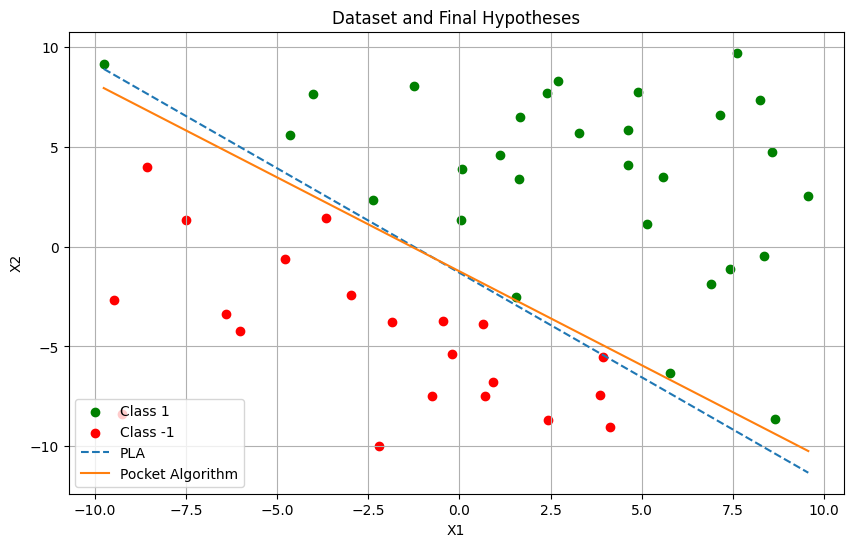

In [ ]:
# Plot the dataset with the final hypotheses
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='green', label='Class 1')
plt.scatter(X[y == -1][:, 1], X[y == -1][:, 2], color='red', label='Class -1')

# Plot the decision boundaries
x_vals = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
plt.plot(x_vals, (-wPLA[0] - wPLA[1] * x_vals) / wPLA[2], '--', label='PLA')
plt.plot(x_vals, (-wPocket[0] - wPocket[1] * x_vals) / wPocket[2], '-', label='Pocket Algorithm')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset and Final Hypotheses')
plt.legend()
plt.grid(True)
plt.show()

In the case of the Pocket Algorithm, during the process of identifying misclassified points, I employ a random selection approach. Consequently, the outcomes may exhibit variability across different runs of the algorithm. I obtained a highly favorable result using the Pocket Algorithm, and I intend to share this result in the submission section.
